In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.aice.046001-046912.nc')

In [3]:
plotvar = data.variables['aice'][20:120:12,0:600,0:3600]
lont = data.variables['TLON'][0:600,0:3600]
latt = data.variables['TLAT'][0:600,0:3600]
aveplot = np.nanmean(plotvar,axis=0)
#aveplot = plotvar

In [4]:
# 63-68,,, 
lont2 = lont[247:365,1100]
latt2 = latt[247:365,1100]
lont3 = lont[247:365,800]
latt3 = latt[247:365,800]
lont4 = lont[247,800:1100]
latt4 = latt[247,800:1100]
lont5 = lont[365,800:1100]
latt5 = latt[365,800:1100]

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'spacing'
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: The following kwargs were not used by contour: 'spacing'


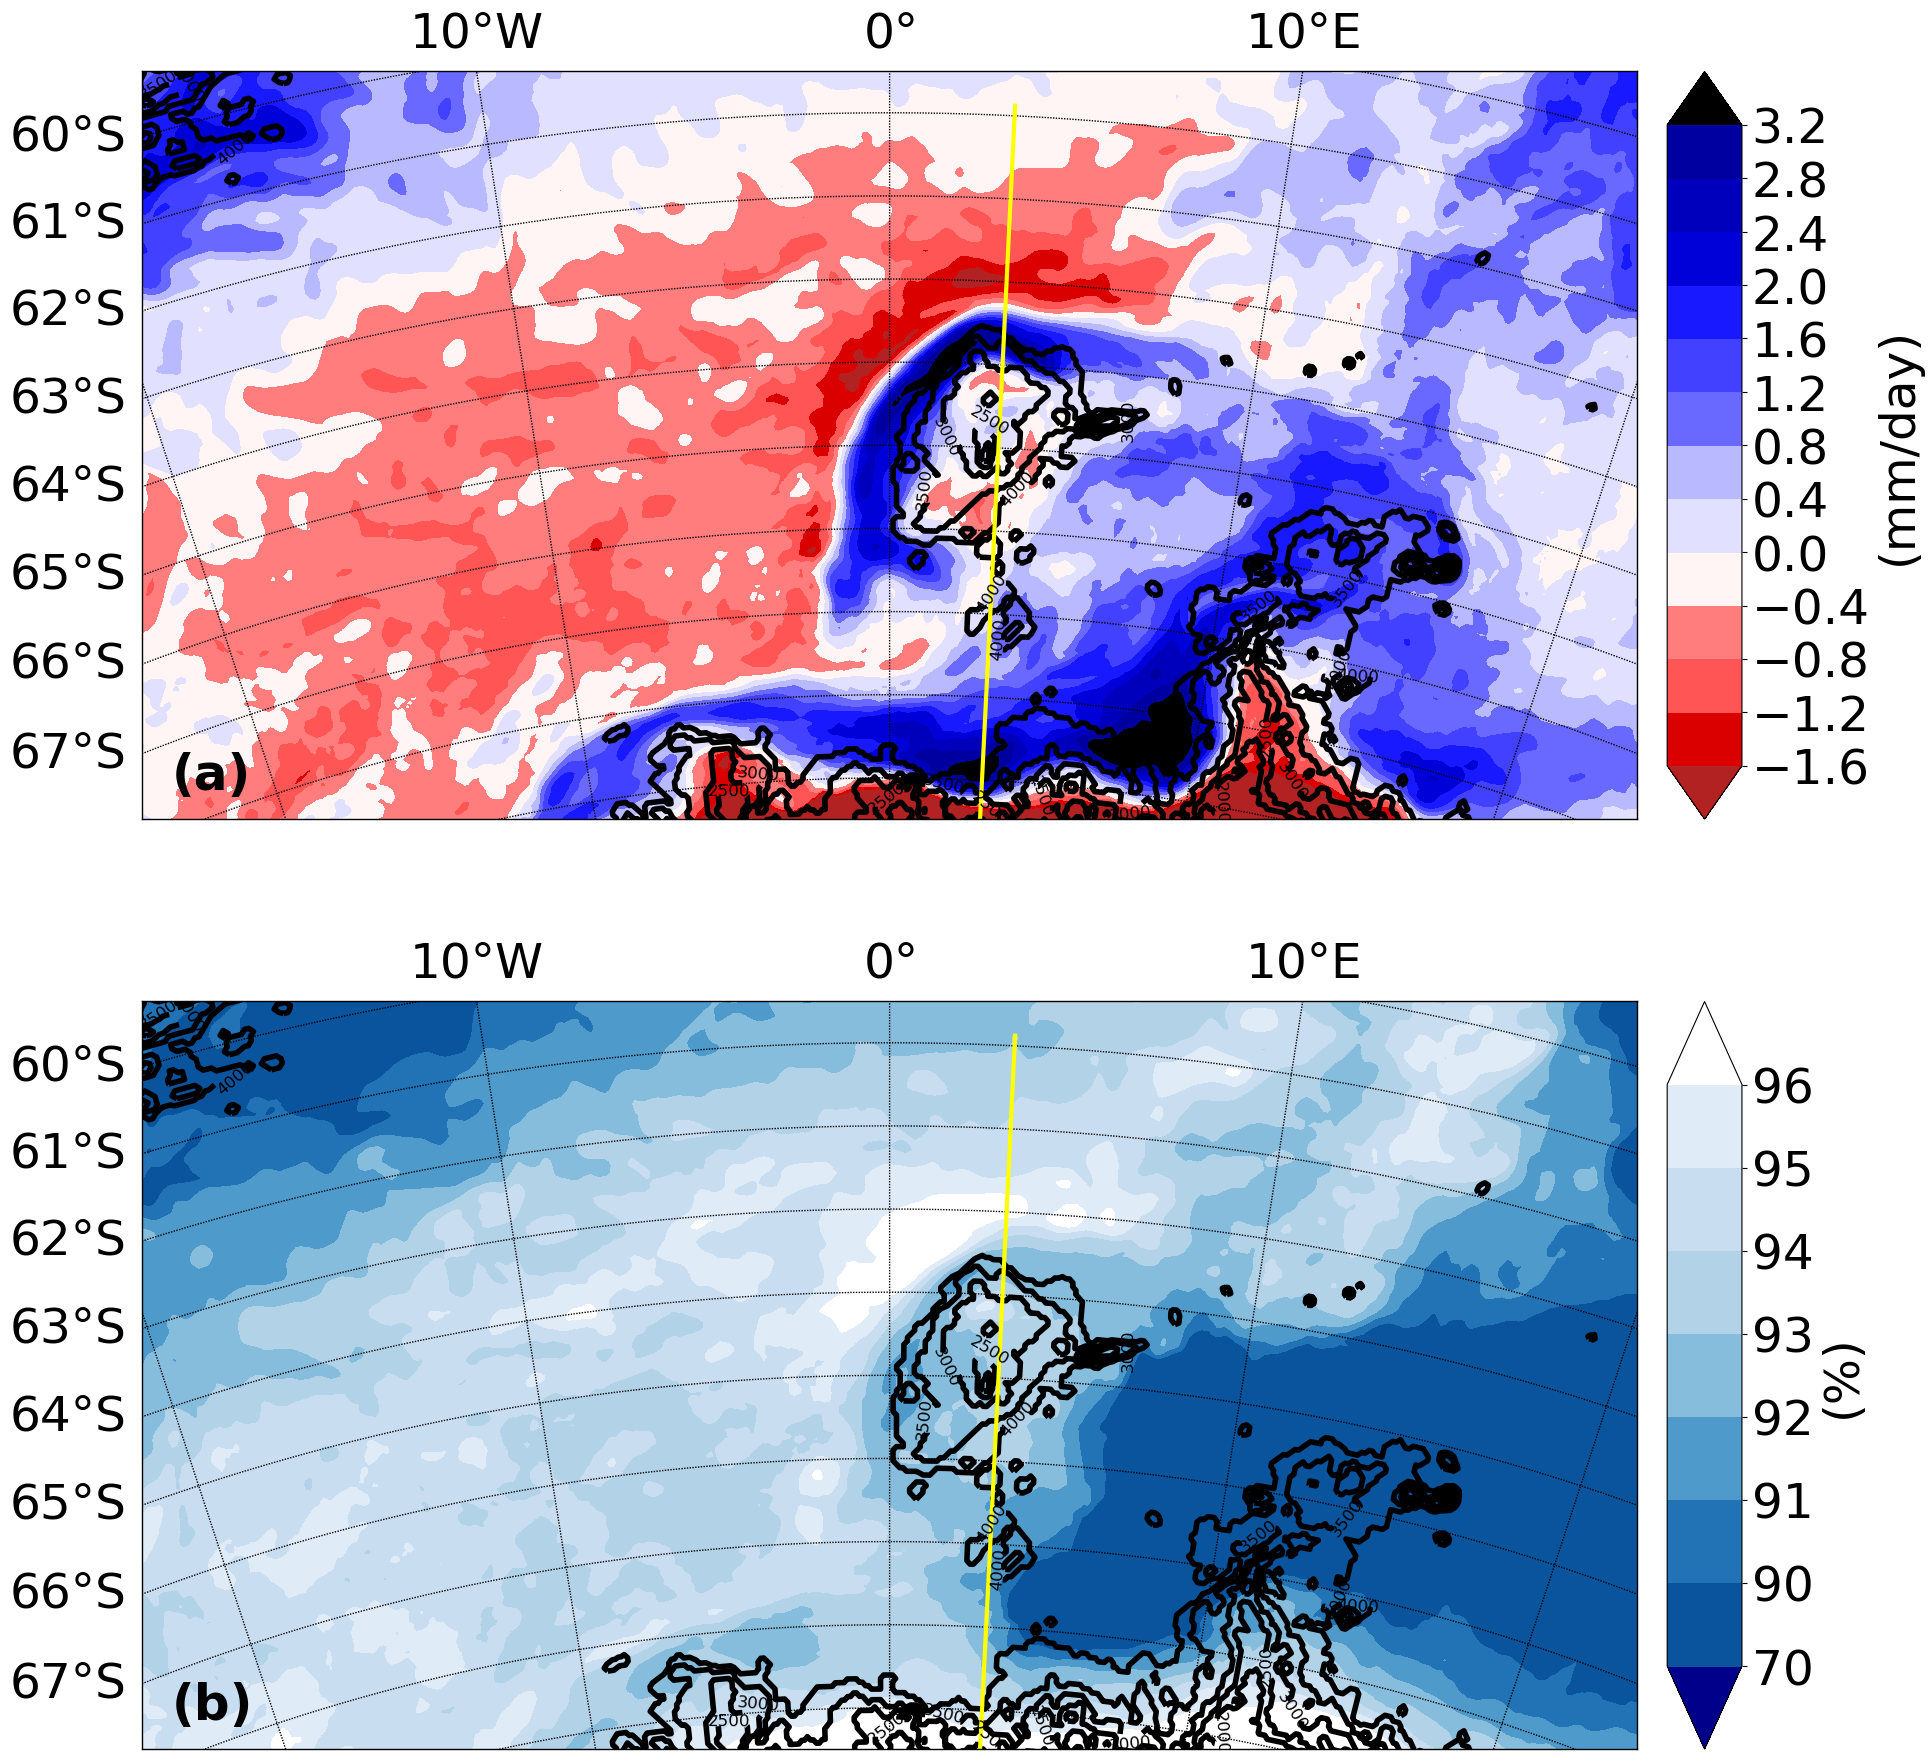

In [19]:
#################################################################
nice_cmap=plt.get_cmap('Blues')
lev_cmap = nice_cmap([220,210,190,180,170,150,130,110,100,90,80,70,60,50,40,30])
new_cmap = cols.ListedColormap(lev_cmap,"Blues")
#nice_levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
nice_levels = [70,90,91,92,93,94,95,96]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#################################################################
nice_levels2 = [2000,2500,3000,3500,4000]
fig = plt.figure(figsize=(20,30), dpi=100)
ax1 = fig.add_axes([0.1, 0.59, 0.8, 0.43],
                    xticklabels=[])
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 2000000,height = 1000000,resolution ='h')  
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,1),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,aveplot,range(0,100),cmap = new_cmap,norm =norm,levels = nice_levels,spacing = 'uniform',extend='both')
CP.cmap.set_over('white')
CP.cmap.set_under('darkblue')
#x2,y2=map(lont2,latt2)
#map.plot(x2,y2,'black',linewidth=8)
x2,y2=map(lont2,latt2)
map.plot(x2,y2,'yellow',linewidth=3)     
xq,yq=map(lontu,lattu)
  
CS = map.contour(xq,yq,plotvar,levels = nice_levels2,colors= 'black',linestyles = 'solid',linewidths=4)
plt.clabel(CS,fontsize=12,fmt='%4d')
#CS=map.contour(x,y,plotvar2,[0.1,0.3],colors = 'green', linestyles = 'solid',linewidths=2)
#plt.clabel(CS,fontsize=30,fmt='%1.1f')

cbar =map.colorbar(CP,extendfrac='auto',ticks = nice_levels)
cbar.ax.tick_params(labelsize=35) 
cbar.set_label('(%)', **my_font)
#plt.xlabel("(b)",**my_font)
ax1.text(0.02, 0.04, '(b)', transform=ax1.transAxes,size=36, weight='bold')
#########################################
ax2 = fig.add_axes([0.1, 0.9, 0.8, 0.43])
nice_cmap=plt.get_cmap('seismic')
lev_cmap = nice_cmap([210,170,160,150,130,120,110,100,90,\
                             80,70,60,50,40,30,20])
new_cmap = cols.ListedColormap(lev_cmap,"seismic")

nice_levels = [-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2.0,2.4,2.8,3.2] 
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
        #********************************************************************nice_levels = [-4,-3,-2,-1,0,1,2,3,4]    
nice_levels2 = [2000,2500,3000,3500,4000]
        #plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}

map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 2000000,height = 1000000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'grey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,1),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)
x2,y2=map(lont2,latt2)
map.plot(x2,y2,'yellow',linewidth=3)
       
xq,yq=map(lontu,lattu)
  
CS = map.contour(xq,yq,plotvar,levels = nice_levels2,colors= 'black',linestyles = 'solid',linewidths=4)
plt.clabel(CS,fontsize=12,fmt='%4d')
x,y=map(lont,latt)
CP2 = map.contourf(x,y,-aveplot2*10,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP2.cmap.set_over('black')
CP2.cmap.set_under('firebrick')
cbar =map.colorbar(CP2,extendfrac='auto',ticks=nice_levels)
cbar.ax.tick_params(labelsize=35)
cbar.set_label('(mm/day)', **my_font)
#plt.suptitle("TIME 0119-10",**my_font)
#plt.xlabel("(a)",**my_font)
ax2.text(0.02, 0.04, '(a)', transform=ax2.transAxes,size=36, weight='bold')
plt.savefig("salintiy2.png",bbox_inches='tight')

In [6]:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.KMT.nc')
        plotvar = data.variables['KMT'][:,:]

In [8]:
        datau=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/UVEL/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.UVEL.nc')
        plotvaru = datau.variables['UVEL'][0,1,:,:]
        lontu = datau.variables['ULONG'][:,:]
        lattu = datau.variables['ULAT'][:,:]

In [9]:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0021-01.z_w_bot.nc')
        plotvar2 = data.variables['z_w_bot'][:]

In [10]:
depth = plotvar2/100

In [11]:
num = np.arange(1,62)

In [12]:
for i in num: 
    plotvar[plotvar==i] = depth[i]

In [13]:
plotvar[plotvar==0] = -1
lontu[lontu ==-1] = np.nan
lattu[lattu ==-1] = np.nan
lontu[:,1089] = -1

In [14]:
lont2 = lontu[200:410,1130]
latt2 = lattu[200:410,1130]

In [15]:
data=nc.Dataset('B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.dvidtt.046001-046912.nc')

In [16]:
plotvar2 = data.variables['dvidtt'][:,0:600,0:3600]
#lont = data.variables['TLON'][0:600,0:3600]
#latt = data.variables['TLAT'][0:600,0:3600]
aveplot2 = np.nanmean(plotvar2,axis=0)